# Module 2 Final Project
- Student: Andrew Wester
- Date: December 2018
- Instructor: Rafael Carrasco

## Hypothesis 1 (Two Tail Test)

- H0 - There is no statistically significant difference in the quantity ordered of discounted vs. non-discounted products.
    - H0: $\mu_1$ = $\mu_2$
- H1 - There is a statistically significant difference in the quantity ordered of discounted vs. non-discounted products.
    - HA: $\mu_1$ $\neq$ $\mu_2$

## Hypothesis 2 (One Tail Test)

- H0 - The top employee does not sell more in dollars than the average employee.
    - H0: $\mu$ $\leq$ $\mu_0$
- H2 - The top employee sells more in dollars than the average employee.
    - HA: $\mu$ > $\mu_0$

## Hypothesis 3 - Revenue against quantity or dollar amount?? - RATE per MONTH

- H0 - The top revenue producing product does not sell more in quantity than the other products.
    - H0: $\mu$ $\leq$ $\mu_0$
- H3 - The top revenue producing product sells more in quantity than the other products.
    - HA: $\mu$ > $\mu_0$

## Hypothesis 4 - Which region (America vs Europe) has highest sales yearly
- H0 - There is no significant difference in revenue from employees in Europe vs America.
    - $\mu_1$ = $\mu_2$
- H4 - There is a significant difference in revenue from employees in Europe vs America.
    - $\mu_1$ $\ne$ $\mu_2$

## Import Libraries

In [345]:
import numpy as np
import pandas as pd
import sqlite3
import statsmodels.api as sm

from scipy import stats
from statsmodels.formula.api import ols 

import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

## Create connection to Northwind Database

In [346]:
conn = sqlite3.connect('Northwind_small.sqlite')
c = conn.cursor()

## Look at each table name from the Northwind Database

In [347]:
c.execute("SELECT name FROM sqlite_master WHERE type = 'table';").fetchall()

[('Employee',),
 ('Category',),
 ('Customer',),
 ('Shipper',),
 ('Supplier',),
 ('Order',),
 ('Product',),
 ('OrderDetail',),
 ('CustomerCustomerDemo',),
 ('CustomerDemographic',),
 ('Region',),
 ('Territory',),
 ('EmployeeTerritory',)]

## From each table, create a new dataframe with information imported from table

In [348]:
employee_df = pd.read_sql_query('SELECT * FROM Employee;', conn)
print(employee_df.info())
employee_df.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9 entries, 0 to 8
Data columns (total 18 columns):
Id                 9 non-null int64
LastName           9 non-null object
FirstName          9 non-null object
Title              9 non-null object
TitleOfCourtesy    9 non-null object
BirthDate          9 non-null object
HireDate           9 non-null object
Address            9 non-null object
City               9 non-null object
Region             9 non-null object
PostalCode         9 non-null object
Country            9 non-null object
HomePhone          9 non-null object
Extension          9 non-null object
Photo              0 non-null object
Notes              9 non-null object
ReportsTo          8 non-null float64
PhotoPath          9 non-null object
dtypes: float64(1), int64(1), object(16)
memory usage: 1.3+ KB
None


,Id,LastName,FirstName,Title,TitleOfCourtesy,BirthDate,HireDate,Address,City,Region,PostalCode,Country,HomePhone,Extension,Photo,Notes,ReportsTo,PhotoPath
0,1,Davolio,Nancy,Sales Representative,Ms.,1980-12-08,2024-05-01,507 - 20th Ave. E. Apt. 2A,Seattle,North America,98122,USA,(206) 555-9857,5467,None,Education includes a BA in psychology from Col...,2.0,http://accweb/emmployees/davolio.bmp
1,2,Fuller,Andrew,"Vice President, Sales",Dr.,1984-02-19,2024-08-14,908 W. Capital Way,Tacoma,North America,98401,USA,(206) 555-9482,3457,None,Andrew received his BTS commercial in 1974 and...,NaN,http://accweb/emmployees/fuller.bmp
2,3,Leverling,Janet,Sales Representative,Ms.,1995-08-30,2024-04-01,722 Moss Bay Blvd.,Kirkland,North America,98033,USA,(206) 555-3412,3355,None,Janet has a BS degree in chemistry from Boston...,2.0,http://accweb/emmployees/leverling.bmp
3,4,Peacock,Margaret,Sales Representative,Mrs.,1969-09-19,2025-05-03,4110 Old Redmond Rd.,Redmond,North America,98052,USA,(206) 555-8122,5176,None,Margaret holds a BA in English literature from...,2.0,http://accweb/emmployees/peacock.bmp
4,5,Buchanan,Steven,Sales Manager,Mr.,1987-03-04,2025-10-17,14 Garrett Hill,London,British Isles,SW1 8JR,UK,(71) 555-4848,3453,None,Steven Buchanan graduated from St. Andrews Uni...,2.0,http://accweb/emmployees/buchanan.bmp


In [349]:
category_df = pd.read_sql_query('SELECT * FROM Category;', conn)
print(category_df.info())
category_df.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8 entries, 0 to 7
Data columns (total 3 columns):
Id              8 non-null int64
CategoryName    8 non-null object
Description     8 non-null object
dtypes: int64(1), object(2)
memory usage: 272.0+ bytes
None


,Id,CategoryName,Description
0,1,Beverages,"Soft drinks, coffees, teas, beers, and ales"
1,2,Condiments,"Sweet and savory sauces, relishes, spreads, an..."
2,3,Confections,"Desserts, candies, and sweet breads"
3,4,Dairy Products,Cheeses
4,5,Grains/Cereals,"Breads, crackers, pasta, and cereal"


In [350]:
customer_df = pd.read_sql_query('SELECT * FROM Customer;', conn)
print(customer_df.info())
customer_df.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 91 entries, 0 to 90
Data columns (total 11 columns):
Id              91 non-null object
CompanyName     91 non-null object
ContactName     91 non-null object
ContactTitle    91 non-null object
Address         91 non-null object
City            91 non-null object
Region          91 non-null object
PostalCode      90 non-null object
Country         91 non-null object
Phone           91 non-null object
Fax             69 non-null object
dtypes: object(11)
memory usage: 7.9+ KB
None


,Id,CompanyName,ContactName,ContactTitle,Address,City,Region,PostalCode,Country,Phone,Fax
0,ALFKI,Alfreds Futterkiste,Maria Anders,Sales Representative,Obere Str. 57,Berlin,Western Europe,12209,Germany,030-0074321,030-0076545
1,ANATR,Ana Trujillo Emparedados y helados,Ana Trujillo,Owner,Avda. de la Constitución 2222,México D.F.,Central America,05021,Mexico,(5) 555-4729,(5) 555-3745
2,ANTON,Antonio Moreno Taquería,Antonio Moreno,Owner,Mataderos 2312,México D.F.,Central America,05023,Mexico,(5) 555-3932,None
3,AROUT,Around the Horn,Thomas Hardy,Sales Representative,120 Hanover Sq.,London,British Isles,WA1 1DP,UK,(171) 555-7788,(171) 555-6750
4,BERGS,Berglunds snabbköp,Christina Berglund,Order Administrator,Berguvsvägen 8,Luleå,Northern Europe,S-958 22,Sweden,0921-12 34 65,0921-12 34 67


In [351]:
shipper_df = pd.read_sql_query('SELECT * FROM Shipper;', conn)
print(shipper_df.info())
shipper_df.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3 entries, 0 to 2
Data columns (total 3 columns):
Id             3 non-null int64
CompanyName    3 non-null object
Phone          3 non-null object
dtypes: int64(1), object(2)
memory usage: 152.0+ bytes
None


,Id,CompanyName,Phone
0,1,Speedy Express,(503) 555-9831
1,2,United Package,(503) 555-3199
2,3,Federal Shipping,(503) 555-9931


In [352]:
supplier_df = pd.read_sql_query('SELECT * FROM Supplier;', conn)
print(supplier_df.info())
supplier_df.head(5)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 29 entries, 0 to 28
Data columns (total 12 columns):
Id              29 non-null int64
CompanyName     29 non-null object
ContactName     29 non-null object
ContactTitle    29 non-null object
Address         29 non-null object
City            29 non-null object
Region          29 non-null object
PostalCode      29 non-null object
Country         29 non-null object
Phone           29 non-null object
Fax             13 non-null object
HomePage        5 non-null object
dtypes: int64(1), object(11)
memory usage: 2.8+ KB
None


,Id,CompanyName,ContactName,ContactTitle,Address,City,Region,PostalCode,Country,Phone,Fax,HomePage
0,1,Exotic Liquids,Charlotte Cooper,Purchasing Manager,49 Gilbert St.,London,British Isles,EC1 4SD,UK,(171) 555-2222,None,None
1,2,New Orleans Cajun Delights,Shelley Burke,Order Administrator,P.O. Box 78934,New Orleans,North America,70117,USA,(100) 555-4822,None,#CAJUN.HTM#
2,3,Grandma Kelly's Homestead,Regina Murphy,Sales Representative,707 Oxford Rd.,Ann Arbor,North America,48104,USA,(313) 555-5735,(313) 555-3349,None
3,4,Tokyo Traders,Yoshi Nagase,Marketing Manager,9-8 Sekimai Musashino-shi,Tokyo,Eastern Asia,100,Japan,(03) 3555-5011,None,None
4,5,Cooperativa de Quesos 'Las Cabras',Antonio del Valle Saavedra,Export Administrator,Calle del Rosal 4,Oviedo,Southern Europe,33007,Spain,(98) 598 76 54,None,None


In [353]:
order_df = pd.read_sql_query('SELECT * FROM [Order];', conn)
print(order_df.info())
order_df.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 830 entries, 0 to 829
Data columns (total 14 columns):
Id                830 non-null int64
CustomerId        830 non-null object
EmployeeId        830 non-null int64
OrderDate         830 non-null object
RequiredDate      830 non-null object
ShippedDate       809 non-null object
ShipVia           830 non-null int64
Freight           830 non-null float64
ShipName          830 non-null object
ShipAddress       830 non-null object
ShipCity          830 non-null object
ShipRegion        830 non-null object
ShipPostalCode    811 non-null object
ShipCountry       830 non-null object
dtypes: float64(1), int64(3), object(10)
memory usage: 90.9+ KB
None


,Id,CustomerId,EmployeeId,OrderDate,RequiredDate,ShippedDate,ShipVia,Freight,ShipName,ShipAddress,ShipCity,ShipRegion,ShipPostalCode,ShipCountry
0,10248,VINET,5,2012-07-04,2012-08-01,2012-07-16,3,32.38,Vins et alcools Chevalier,59 rue de l'Abbaye,Reims,Western Europe,51100,France
1,10249,TOMSP,6,2012-07-05,2012-08-16,2012-07-10,1,11.61,Toms Spezialitäten,Luisenstr. 48,Münster,Western Europe,44087,Germany
2,10250,HANAR,4,2012-07-08,2012-08-05,2012-07-12,2,65.83,Hanari Carnes,"Rua do Paço, 67",Rio de Janeiro,South America,05454-876,Brazil
3,10251,VICTE,3,2012-07-08,2012-08-05,2012-07-15,1,41.34,Victuailles en stock,"2, rue du Commerce",Lyon,Western Europe,69004,France
4,10252,SUPRD,4,2012-07-09,2012-08-06,2012-07-11,2,51.30,Suprêmes délices,"Boulevard Tirou, 255",Charleroi,Western Europe,B-6000,Belgium


In [354]:
product_df = pd.read_sql_query('SELECT * FROM Product;', conn)
print(product_df.info())
product_df.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 77 entries, 0 to 76
Data columns (total 10 columns):
Id                 77 non-null int64
ProductName        77 non-null object
SupplierId         77 non-null int64
CategoryId         77 non-null int64
QuantityPerUnit    77 non-null object
UnitPrice          77 non-null float64
UnitsInStock       77 non-null int64
UnitsOnOrder       77 non-null int64
ReorderLevel       77 non-null int64
Discontinued       77 non-null int64
dtypes: float64(1), int64(7), object(2)
memory usage: 6.1+ KB
None


,Id,ProductName,SupplierId,CategoryId,QuantityPerUnit,UnitPrice,UnitsInStock,UnitsOnOrder,ReorderLevel,Discontinued
0,1,Chai,1,1,10 boxes x 20 bags,18.00,39,0,10,0
1,2,Chang,1,1,24 - 12 oz bottles,19.00,17,40,25,0
2,3,Aniseed Syrup,1,2,12 - 550 ml bottles,10.00,13,70,25,0
3,4,Chef Anton's Cajun Seasoning,2,2,48 - 6 oz jars,22.00,53,0,0,0
4,5,Chef Anton's Gumbo Mix,2,2,36 boxes,21.35,0,0,0,1


## Import OrderDetail Table and add columns for:
#### OrderPrice = (Quantity x UnitPrice)     &     DiscountPrice = (OrderPrice x (1-Discount))

In [355]:
orderdetail_df = pd.read_sql_query('SELECT * FROM OrderDetail;', conn)
orderdetail_df['OrderPrice'] = orderdetail_df.UnitPrice * orderdetail_df.Quantity
orderdetail_df['DiscountPrice'] = orderdetail_df.OrderPrice * (1-orderdetail_df.Discount)
print(orderdetail_df.info())
orderdetail_df.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2155 entries, 0 to 2154
Data columns (total 8 columns):
Id               2155 non-null object
OrderId          2155 non-null int64
ProductId        2155 non-null int64
UnitPrice        2155 non-null float64
Quantity         2155 non-null int64
Discount         2155 non-null float64
OrderPrice       2155 non-null float64
DiscountPrice    2155 non-null float64
dtypes: float64(4), int64(3), object(1)
memory usage: 134.8+ KB
None


,Id,OrderId,ProductId,UnitPrice,Quantity,Discount,OrderPrice,DiscountPrice
0,10248/11,10248,11,14.0,12,0.0,168.0,168.0
1,10248/42,10248,42,9.8,10,0.0,98.0,98.0
2,10248/72,10248,72,34.8,5,0.0,174.0,174.0
3,10249/14,10249,14,18.6,9,0.0,167.4,167.4
4,10249/51,10249,51,42.4,40,0.0,1696.0,1696.0


In [356]:
customerdemo_df = pd.read_sql_query('SELECT * FROM CustomerCustomerDemo;', conn)
print(customerdemo_df.info())
customerdemo_df.head()

<class 'pandas.core.frame.DataFrame'>
Index: 0 entries
Data columns (total 2 columns):
Id                0 non-null object
CustomerTypeId    0 non-null object
dtypes: object(2)
memory usage: 0.0+ bytes
None


,Id,CustomerTypeId


In [357]:
customerdemographic_df = pd.read_sql_query('SELECT * FROM CustomerDemographic;', conn)
print(customerdemographic_df.info())
customerdemographic_df.head()

<class 'pandas.core.frame.DataFrame'>
Index: 0 entries
Data columns (total 2 columns):
Id              0 non-null object
CustomerDesc    0 non-null object
dtypes: object(2)
memory usage: 0.0+ bytes
None


,Id,CustomerDesc


In [358]:
region_df = pd.read_sql_query('SELECT * FROM Region;', conn)
print(region_df.info())
region_df.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4 entries, 0 to 3
Data columns (total 2 columns):
Id                   4 non-null int64
RegionDescription    4 non-null object
dtypes: int64(1), object(1)
memory usage: 144.0+ bytes
None


,Id,RegionDescription
0,1,Eastern
1,2,Western
2,3,Northern
3,4,Southern


In [359]:
territory_df = pd.read_sql_query('SELECT * FROM Territory;', conn)
print(territory_df.info())
territory_df.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 53 entries, 0 to 52
Data columns (total 3 columns):
Id                      53 non-null object
TerritoryDescription    53 non-null object
RegionId                53 non-null int64
dtypes: int64(1), object(2)
memory usage: 1.3+ KB
None


,Id,TerritoryDescription,RegionId
0,01581,Westboro,1
1,01730,Bedford,1
2,01833,Georgetow,1
3,02116,Boston,1
4,02139,Cambridge,1


In [360]:
employeeterritory_df = pd.read_sql_query('SELECT * FROM EmployeeTerritory;', conn)
print(employeeterritory_df.info())
employeeterritory_df.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 49 entries, 0 to 48
Data columns (total 3 columns):
Id             49 non-null object
EmployeeId     49 non-null int64
TerritoryId    49 non-null object
dtypes: int64(1), object(2)
memory usage: 1.2+ KB
None


,Id,EmployeeId,TerritoryId
0,1/06897,1,06897
1,1/19713,1,19713
2,2/01581,2,01581
3,2/01730,2,01730
4,2/01833,2,01833


# Now that Tables are Imported...

## Hypothesis 1:
#### H0: No statistically significant difference in quantity ordered for discounted vs non-discounted products
#### H0: $\mu_1$ = $\mu_2$
#### H1: There is a statistically significant difference in quantity ordered of discounted vs. non-discounted products.
#### HA: $\mu_1$ $\neq$ $\mu_2$

## Graph the dispersion of Discounts in all the Orders

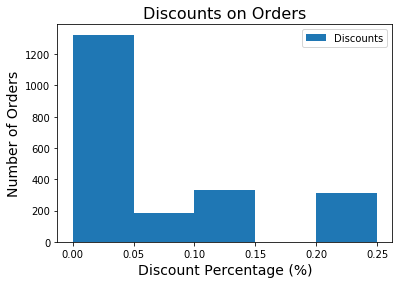

In [361]:
x = orderdetail_df['Discount']
plt.hist(x, label="Discounts", bins=5, align='mid')
plt.title("Discounts on Orders", fontsize = 16)
plt.xlabel("Discount Percentage (%)", fontsize = 14)
plt.ylabel("Number of Orders", fontsize = 14)
plt.legend();

## Split the data by orders that had a discount applied and those without a discount

## Display information for both tables in order to examine number of orders, etc...

In [362]:
discount = orderdetail_df.loc[orderdetail_df['Discount'] > 0]
full = orderdetail_df.loc[orderdetail_df['Discount'] == 0]
print("Discounted Table")
print(discount.info())
print()
print('-'*50)
print()
print("Full Price Table")
print(full.info())

Discounted Table
<class 'pandas.core.frame.DataFrame'>
Int64Index: 838 entries, 6 to 2152
Data columns (total 8 columns):
Id               838 non-null object
OrderId          838 non-null int64
ProductId        838 non-null int64
UnitPrice        838 non-null float64
Quantity         838 non-null int64
Discount         838 non-null float64
OrderPrice       838 non-null float64
DiscountPrice    838 non-null float64
dtypes: float64(4), int64(3), object(1)
memory usage: 58.9+ KB
None

--------------------------------------------------

Full Price Table
<class 'pandas.core.frame.DataFrame'>
Int64Index: 1317 entries, 0 to 2154
Data columns (total 8 columns):
Id               1317 non-null object
OrderId          1317 non-null int64
ProductId        1317 non-null int64
UnitPrice        1317 non-null float64
Quantity         1317 non-null int64
Discount         1317 non-null float64
OrderPrice       1317 non-null float64
DiscountPrice    1317 non-null float64
dtypes: float64(4), int64(3), ob

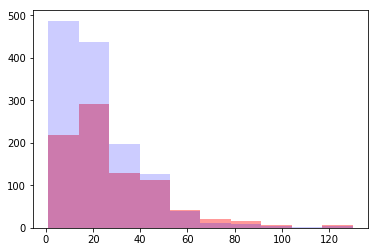

In [363]:
plt.hist(discount.Quantity, alpha = 0.4, color='red')
plt.hist(full.Quantity, alpha = 0.2, color='blue');

## Look at differences in Variance, Mean, and Standard Deviation between the two groups

In [364]:
discount.Quantity.var(), full.Quantity.var()

(431.45268788690146, 306.51232768588454)

In [365]:
discount.Quantity.mean(), full.Quantity.mean()

(27.10978520286396, 21.715261958997722)

In [366]:
discount.Quantity.std(), full.Quantity.std()

(20.77143923484604, 17.50749347239303)

## WHY: Independent T-Test
- We run the Independent t Test to compare the means of two independent groups in order to determine whether there is statistical evidence that the associated population means are significantly different.

In [367]:
stats.ttest_ind(discount.Quantity.values, full.Quantity.values)

Ttest_indResult(statistic=6.4785631962949015, pvalue=1.1440924523215966e-10)

## WHY: Welch's T-Test
- We run a Welch's T-Test when we can't assume that we have equal variance and sample size between our two samples

In [368]:
stats.ttest_ind(discount.Quantity.values, full.Quantity.values, equal_var=False)

Ttest_indResult(statistic=6.239069142123973, pvalue=5.65641429030433e-10)

## Low P-Value!

#### T-Test Tells us: There is a Statistically Significant Difference in Quantity of items ordered with a discount vs. non-discount


### NEED TO INCLUDE: WHY AM I RUNNING EACH TEST

In [369]:
def cohens_d(group1, group2):
    
    """Return Cohen's d to evaluate effect size
    Cohen's d = difference between means of two groups divided by their pooled standard deviation
    0.2 = small effect
    0.5 = medium effect
    0.8 large effect
    
    Return:
    d : Cohen's D (Effect Size)
    """
    numer = group1.mean() - group2.mean()
    n1, n2 = len(group1), len(group2)
    var1, var2 = group1.var(), group2.var()
    pooled_var = (n1 * var1 + n2 * var2) / (n1 + n2)
    denom = np.sqrt(pooled_var)
    return numer / denom

In [370]:
cohens_d(discount.Quantity, full.Quantity)

0.2862724481729282

## A Cohen's d value of about 0.3 indicates a small to medium effect size, which is the practical size of the difference between the two groups.

# Hypothesis 2 

- H0 - The top employee does not sell more in dollars than the average employee.
    - H0: $\mu$ $\leq$ $\mu_0$
- H2 - The top employee sells more in dollars than the average employee.
    - HA: $\mu$ > $\mu_0$


### Start by looking at the table of employees and their territories to examine differences and points of interest

In [371]:
employee_df

,Id,LastName,FirstName,Title,TitleOfCourtesy,BirthDate,HireDate,Address,City,Region,PostalCode,Country,HomePhone,Extension,Photo,Notes,ReportsTo,PhotoPath
0,1,Davolio,Nancy,Sales Representative,Ms.,1980-12-08,2024-05-01,507 - 20th Ave. E. Apt. 2A,Seattle,North America,98122,USA,(206) 555-9857,5467,None,Education includes a BA in psychology from Col...,2.0,http://accweb/emmployees/davolio.bmp
1,2,Fuller,Andrew,"Vice President, Sales",Dr.,1984-02-19,2024-08-14,908 W. Capital Way,Tacoma,North America,98401,USA,(206) 555-9482,3457,None,Andrew received his BTS commercial in 1974 and...,NaN,http://accweb/emmployees/fuller.bmp
2,3,Leverling,Janet,Sales Representative,Ms.,1995-08-30,2024-04-01,722 Moss Bay Blvd.,Kirkland,North America,98033,USA,(206) 555-3412,3355,None,Janet has a BS degree in chemistry from Boston...,2.0,http://accweb/emmployees/leverling.bmp
3,4,Peacock,Margaret,Sales Representative,Mrs.,1969-09-19,2025-05-03,4110 Old Redmond Rd.,Redmond,North America,98052,USA,(206) 555-8122,5176,None,Margaret holds a BA in English literature from...,2.0,http://accweb/emmployees/peacock.bmp
4,5,Buchanan,Steven,Sales Manager,Mr.,1987-03-04,2025-10-17,14 Garrett Hill,London,British Isles,SW1 8JR,UK,(71) 555-4848,3453,None,Steven Buchanan graduated from St. Andrews Uni...,2.0,http://accweb/emmployees/buchanan.bmp
5,6,Suyama,Michael,Sales Representative,Mr.,1995-07-02,2025-10-17,Coventry House Miner Rd.,London,British Isles,EC2 7JR,UK,(71) 555-7773,428,None,Michael is a graduate of Sussex University (MA...,5.0,http://accweb/emmployees/davolio.bmp
6,7,King,Robert,Sales Representative,Mr.,1992-05-29,2026-01-02,Edgeham Hollow Winchester Way,London,British Isles,RG1 9SP,UK,(71) 555-5598,465,None,Robert King served in the Peace Corps and trav...,5.0,http://accweb/emmployees/davolio.bmp
7,8,Callahan,Laura,Inside Sales Coordinator,Ms.,1990-01-09,2026-03-05,4726 - 11th Ave. N.E.,Seattle,North America,98105,USA,(206) 555-1189,2344,None,Laura received a BA in psychology from the Uni...,2.0,http://accweb/emmployees/davolio.bmp
8,9,Dodsworth,Anne,Sales Representative,Ms.,1998-01-27,2026-11-15,7 Houndstooth Rd.,London,British Isles,WG2 7LT,UK,(71) 555-4444,452,None,Anne has a BA degree in English from St. Lawre...,5.0,http://accweb/emmployees/davolio.bmp


In [372]:
employeeterritory_df.head()

,Id,EmployeeId,TerritoryId
0,1/06897,1,06897
1,1/19713,1,19713
2,2/01581,2,01581
3,2/01730,2,01730
4,2/01833,2,01833


In [373]:
order_df.head()

,Id,CustomerId,EmployeeId,OrderDate,RequiredDate,ShippedDate,ShipVia,Freight,ShipName,ShipAddress,ShipCity,ShipRegion,ShipPostalCode,ShipCountry
0,10248,VINET,5,2012-07-04,2012-08-01,2012-07-16,3,32.38,Vins et alcools Chevalier,59 rue de l'Abbaye,Reims,Western Europe,51100,France
1,10249,TOMSP,6,2012-07-05,2012-08-16,2012-07-10,1,11.61,Toms Spezialitäten,Luisenstr. 48,Münster,Western Europe,44087,Germany
2,10250,HANAR,4,2012-07-08,2012-08-05,2012-07-12,2,65.83,Hanari Carnes,"Rua do Paço, 67",Rio de Janeiro,South America,05454-876,Brazil
3,10251,VICTE,3,2012-07-08,2012-08-05,2012-07-15,1,41.34,Victuailles en stock,"2, rue du Commerce",Lyon,Western Europe,69004,France
4,10252,SUPRD,4,2012-07-09,2012-08-06,2012-07-11,2,51.30,Suprêmes délices,"Boulevard Tirou, 255",Charleroi,Western Europe,B-6000,Belgium


In [374]:
order_df = order_df.drop(columns=['CustomerId', 'RequiredDate', 'ShippedDate', 'ShipName', 'ShipAddress', 
                       'ShipCity', 'ShipPostalCode'])

In [376]:
order_df.head()

,Id,EmployeeId,OrderDate,ShipVia,Freight,ShipRegion,ShipCountry
0,10248,5,2012-07-04,3,32.38,Western Europe,France
1,10249,6,2012-07-05,1,11.61,Western Europe,Germany
2,10250,4,2012-07-08,2,65.83,South America,Brazil
3,10251,3,2012-07-08,1,41.34,Western Europe,France
4,10252,4,2012-07-09,2,51.30,Western Europe,Belgium


In [377]:
orderdetail_df.head()

,Id,OrderId,ProductId,UnitPrice,Quantity,Discount,OrderPrice,DiscountPrice
0,10248/11,10248,11,14.0,12,0.0,168.0,168.0
1,10248/42,10248,42,9.8,10,0.0,98.0,98.0
2,10248/72,10248,72,34.8,5,0.0,174.0,174.0
3,10249/14,10249,14,18.6,9,0.0,167.4,167.4
4,10249/51,10249,51,42.4,40,0.0,1696.0,1696.0


In [378]:
orderdetail_df = orderdetail_df.drop(columns='Id')
orderdetail_df.sort_values(by='OrderId', inplace=True)
print(orderdetail_df.info())
orderdetail_df.head()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2155 entries, 0 to 2154
Data columns (total 7 columns):
OrderId          2155 non-null int64
ProductId        2155 non-null int64
UnitPrice        2155 non-null float64
Quantity         2155 non-null int64
Discount         2155 non-null float64
OrderPrice       2155 non-null float64
DiscountPrice    2155 non-null float64
dtypes: float64(4), int64(3)
memory usage: 134.7 KB
None


,OrderId,ProductId,UnitPrice,Quantity,Discount,OrderPrice,DiscountPrice
0,10248,11,14.0,12,0.0,168.0,168.0
1,10248,42,9.8,10,0.0,98.0,98.0
2,10248,72,34.8,5,0.0,174.0,174.0
3,10249,14,18.6,9,0.0,167.4,167.4
4,10249,51,42.4,40,0.0,1696.0,1696.0


In [385]:
order_df.rename(columns={"Id":"OrderId"}, inplace=True)

In [386]:
print(order_df.info())
order_df.head()

<class 'pandas.core.frame.DataFrame'>
Index: 830 entries, 0 to 829
Data columns (total 7 columns):
OrderId        830 non-null int64
EmployeeId     830 non-null int64
OrderDate      830 non-null object
ShipVia        830 non-null int64
Freight        830 non-null float64
ShipRegion     830 non-null object
ShipCountry    830 non-null object
dtypes: float64(1), int64(3), object(3)
memory usage: 51.9+ KB
None


,OrderId,EmployeeId,OrderDate,ShipVia,Freight,ShipRegion,ShipCountry
0,10248,5,2012-07-04,3,32.38,Western Europe,France
1,10249,6,2012-07-05,1,11.61,Western Europe,Germany
2,10250,4,2012-07-08,2,65.83,South America,Brazil
3,10251,3,2012-07-08,1,41.34,Western Europe,France
4,10252,4,2012-07-09,2,51.30,Western Europe,Belgium


In [389]:
all_orders = pd.concat([orderdetail_df, order_df], axis=1)
all_orders.head()

/Users/steeznation/anaconda3/envs/learn-env/lib/python3.6/site-packages/pandas/core/indexes/api.py:107: RuntimeWarning: '<' not supported between instances of 'int' and 'str', sort order is undefined for incomparable objects
  result = result.union(other)


,OrderId,ProductId,UnitPrice,Quantity,Discount,OrderPrice,DiscountPrice,OrderId,EmployeeId,OrderDate,ShipVia,Freight,ShipRegion,ShipCountry
0,10248.0,11.0,14.0,12.0,0.0,168.0,168.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,10248.0,42.0,9.8,10.0,0.0,98.0,98.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,10248.0,72.0,34.8,5.0,0.0,174.0,174.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,10249.0,14.0,18.6,9.0,0.0,167.4,167.4,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,10249.0,51.0,42.4,40.0,0.0,1696.0,1696.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [340]:
all_orders.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2155 entries, 0 to 2154
Data columns (total 14 columns):
OrderId          2155 non-null int64
ProductId        2155 non-null int64
UnitPrice        2155 non-null float64
Quantity         2155 non-null int64
Discount         2155 non-null float64
OrderPrice       2155 non-null float64
DiscountPrice    2155 non-null float64
Id               830 non-null float64
EmployeeId       830 non-null float64
OrderDate        830 non-null object
ShipVia          830 non-null float64
Freight          830 non-null float64
ShipRegion       830 non-null object
ShipCountry      830 non-null object
dtypes: float64(8), int64(3), object(3)
memory usage: 252.5+ KB


In [342]:
all_orders.sort_values(by='OrderId', inplace=True)
all_orders.head()

,OrderId,ProductId,UnitPrice,Quantity,Discount,OrderPrice,DiscountPrice,Id,EmployeeId,OrderDate,ShipVia,Freight,ShipRegion,ShipCountry
2,10248,72,34.8,5,0.0,174.0,174.0,10250.0,4.0,2012-07-08,2.0,65.83,South America,Brazil
0,10248,11,14.0,12,0.0,168.0,168.0,10248.0,5.0,2012-07-04,3.0,32.38,Western Europe,France
1,10248,42,9.8,10,0.0,98.0,98.0,10249.0,6.0,2012-07-05,1.0,11.61,Western Europe,Germany
4,10249,51,42.4,40,0.0,1696.0,1696.0,10252.0,4.0,2012-07-09,2.0,51.30,Western Europe,Belgium
3,10249,14,18.6,9,0.0,167.4,167.4,10251.0,3.0,2012-07-08,1.0,41.34,Western Europe,France


In [343]:
keys = ["employee{}_orders".format(id) for id in all_orders.EmployeeId.unique()]
keys

['employee4.0_orders',
 'employee5.0_orders',
 'employee6.0_orders',
 'employee3.0_orders',
 'employee9.0_orders',
 'employee1.0_orders',
 'employee8.0_orders',
 'employee2.0_orders',
 'employee7.0_orders',
 'employeenan_orders']

In [269]:
employee_orders_dict = {}
for index, key in enumerate(keys):
    employee_orders_dict[key] = all_orders[all_orders.EmployeeId==index+1]

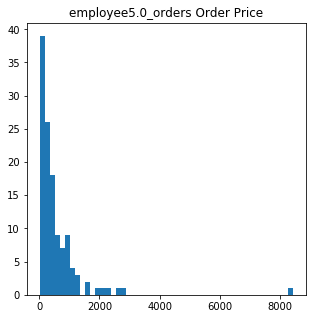

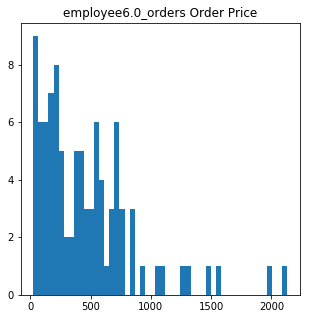

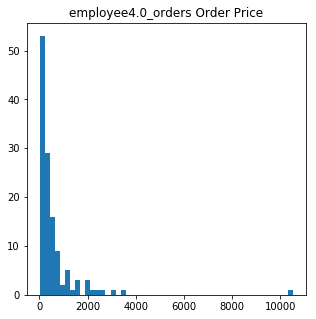

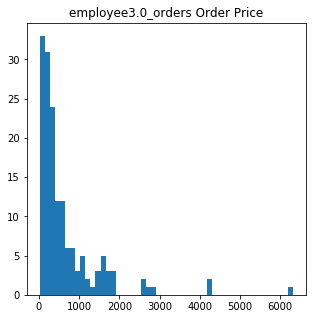

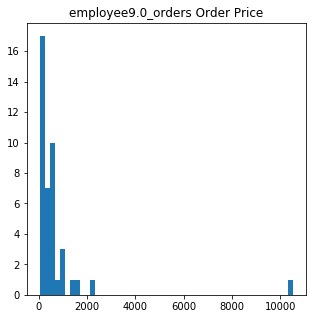

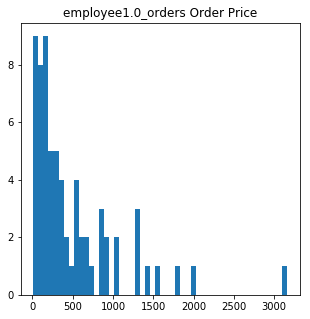

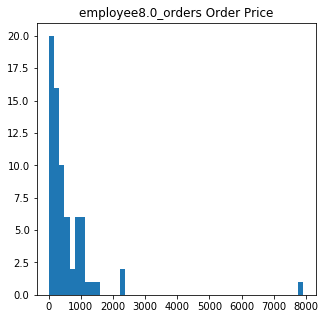

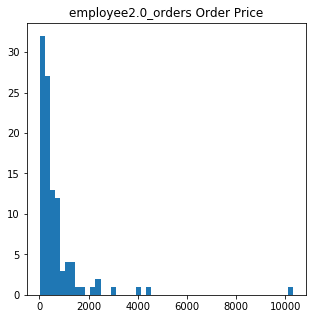

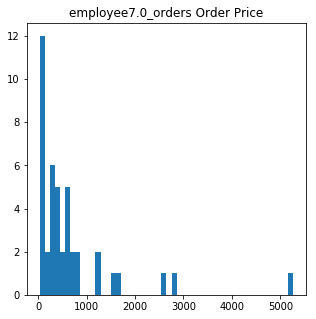

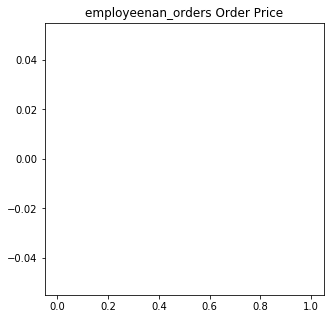

In [272]:
for employee_id, table in employee_orders_dict.items():
    plt.figure(figsize=(5, 5))
    plt.hist(table.OrderPrice, bins=50)
    #plt.xlim(0, 3*table.std())
    plt.title(employee_id + " Order Price")
    plt.show()

In [ ]:
a = employee_orders_dict["employee1_orders"]["OrderPrice"].sum()
b = employee_orders_dict["employee1_orders"]["DiscountPrice"].sum()
c = all_orders.loc[all_orders.EmployeeId == 1]["OrderId"].nunique()
print("Employee 1 - Total Sales: ${:.2f}".format(a))
print('-'*50)
print("Employee 1 - Total Discounted Sales: ${:.2f}".format(b))
print('-'*50)
print("Employee 1 - Total Number of Orders: {}".format(c))
print('-'*50)
print("Employee 1 - Average Sale Price: ${:.2f}".format(a / c))
print('-'*50)
print("Employee 1 - Average Discount Sale Price: ${:.2f}".format(b / c))

In [ ]:
a = employee_orders_dict["employee2_orders"]["OrderPrice"].sum()
b = employee_orders_dict["employee2_orders"]["DiscountPrice"].sum()
c = all_orders.loc[all_orders.EmployeeId == 2]["OrderId"].nunique()
print("Employee 2 - Total Sales: ${:.2f}".format(a))
print('-'*50)
print("Employee 2 - Total Discounted Sales: ${:.2f}".format(b))
print('-'*50)
print("Employee 2 - Total Number of Orders: {}".format(c))
print('-'*50)
print("Employee 2 - Average Sale Price: ${:.2f}".format(a / c))
print('-'*50)
print("Employee 2 - Average Discount Sale Price: ${:.2f}".format(b / c))

In [ ]:
a = employee_orders_dict["employee3_orders"]["OrderPrice"].sum()
b = employee_orders_dict["employee3_orders"]["DiscountPrice"].sum()
c = all_orders.loc[all_orders.EmployeeId == 3]["OrderId"].nunique()
print("Employee 3 - Total Sales: ${:.2f}".format(a))
print('-'*50)
print("Employee 3 - Total Discounted Sales: ${:.2f}".format(b))
print('-'*50)
print("Employee 3 - Total Number of Orders: {}".format(c))
print('-'*50)
print("Employee 3 - Average Sale Price: ${:.2f}".format(a / c))
print('-'*50)
print("Employee 3 - Average Discount Sale Price: ${:.2f}".format(b / c))

In [ ]:
a = employee_orders_dict["employee4_orders"]["OrderPrice"].sum()
b = employee_orders_dict["employee4_orders"]["DiscountPrice"].sum()
c = all_orders.loc[all_orders.EmployeeId == 4]["OrderId"].nunique()
print("Employee 4 - Total Sales: ${:.2f}".format(a))
print('-'*50)
print("Employee 4 - Total Discounted Sales: ${:.2f}".format(b))
print('-'*50)
print("Employee 4 - Total Number of Orders: {}".format(c))
print('-'*50)
print("Employee 4 - Average Sale Price: ${:.2f}".format(a / c))
print('-'*50)
print("Employee 4 - Average Discount Sale Price: ${:.2f}".format(b / c))

In [ ]:
a = employee_orders_dict["employee5_orders"]["OrderPrice"].sum()
b = employee_orders_dict["employee5_orders"]["DiscountPrice"].sum()
c = all_orders.loc[all_orders.EmployeeId == 5]["OrderId"].nunique()
print("Employee 5 - Total Sales: ${:.2f}".format(a))
print('-'*50)
print("Employee 5 - Total Discounted Sales: ${:.2f}".format(b))
print('-'*50)
print("Employee 5 - Total Number of Orders: {}".format(c))
print('-'*50)
print("Employee 5 - Average Sale Price: ${:.2f}".format(a / c))
print('-'*50)
print("Employee 5 - Average Discount Sale Price: ${:.2f}".format(b / c))

In [ ]:
a = employee_orders_dict["employee6_orders"]["OrderPrice"].sum()
b = employee_orders_dict["employee6_orders"]["DiscountPrice"].sum()
c = all_orders.loc[all_orders.EmployeeId == 6]["OrderId"].nunique()
print("Employee 6 - Total Sales: ${:.2f}".format(a))
print('-'*50)
print("Employee 6 - Total Discounted Sales: ${:.2f}".format(b))
print('-'*50)
print("Employee 6 - Total Number of Orders: {}".format(c))
print('-'*50)
print("Employee 6 - Average Sale Price: ${:.2f}".format(a / c))
print('-'*50)
print("Employee 6 - Average Discount Sale Price: ${:.2f}".format(b / c))

In [ ]:
a = employee_orders_dict["employee7_orders"]["OrderPrice"].sum()
b = employee_orders_dict["employee7_orders"]["DiscountPrice"].sum()
c = all_orders.loc[all_orders.EmployeeId == 7]["OrderId"].nunique()
print("Employee 7 - Total Sales: ${:.2f}".format(a))
print('-'*50)
print("Employee 7 - Total Discounted Sales: ${:.2f}".format(b))
print('-'*50)
print("Employee 7 - Total Number of Orders: {}".format(c))
print('-'*50)
print("Employee 7 - Average Sale Price: ${:.2f}".format(a / c))
print('-'*50)
print("Employee 7 - Average Discount Sale Price: ${:.2f}".format(b / c))

In [ ]:
a = employee_orders_dict["employee8_orders"]["OrderPrice"].sum()
b = employee_orders_dict["employee8_orders"]["DiscountPrice"].sum()
c = all_orders.loc[all_orders.EmployeeId == 8]["OrderId"].nunique()
print("Employee 8 - Total Sales: ${:.2f}".format(a))
print('-'*50)
print("Employee 8 - Total Discounted Sales: ${:.2f}".format(b))
print('-'*50)
print("Employee 8 - Total Number of Orders: {}".format(c))
print('-'*50)
print("Employee 8 - Average Sale Price: ${:.2f}".format(a / c))
print('-'*50)
print("Employee 8 - Average Discount Sale Price: ${:.2f}".format(b / c))

In [ ]:
a = employee_orders_dict["employee9_orders"]["OrderPrice"].sum()
b = employee_orders_dict["employee9_orders"]["DiscountPrice"].sum()
c = all_orders.loc[all_orders.EmployeeId == 9]["OrderId"].nunique()
print("Employee 9 - Total Sales: ${:.2f}".format(a))
print('-'*50)
print("Employee 9 - Total Discounted Sales: ${:.2f}".format(b))
print('-'*50)
print("Employee 9 - Total Number of Orders: {}".format(c))
print('-'*50)
print("Employee 9 - Average Sale Price: ${:.2f}".format(a / c))
print('-'*50)
print("Employee 9 - Average Discount Sale Price: ${:.2f}".format(b / c))

In [ ]:
all_orders.sort_values(by='EmployeeId').head()

In [ ]:
all_orders.groupby(by=all_orders.EmployeeId)["OrderPrice", "DiscountPrice", "Quantity"].sum()

In [ ]:
all_orders.groupby(by=all_orders.EmployeeId)["OrderPrice", "DiscountPrice", "Quantity"].mean()

In [ ]:
all_orders.groupby(by=all_orders.EmployeeId)["OrderPrice", "DiscountPrice", "Quantity"].var()

In [ ]:
all_orders.groupby(by=all_orders.EmployeeId)["OrderPrice", "DiscountPrice", "Quantity"].std()

# SO....
#### We can find out total amount of sales for all orders (sum of all order prices): $1,354,458.59$
#### We can find the total number of orders (total number of orders placed): 830
#### Therefore, we can calculated the average price of each order placed (total sales / total orders): $1,631.88$

In [ ]:
print("Total Sales: ${:.2f}".format(all_orders.OrderPrice.sum()))
print("Total Orders: {}".format(all_orders.OrderId.nunique()))
print("Average Order Price: ${:.2f}".format((all_orders.OrderPrice.sum() / all_orders.OrderId.nunique())))

### So, our hypotheses are:

## Ho: $\mu$ = $1631.88

## Ha: **\(x̄)** > $1631.88

In [ ]:
# Population mean for order price (μ)
mu = 1631.88

# Mean (x̄) order price for top sales person
orders = all_orders.loc[all_orders.EmployeeId == 4]["OrderId"].nunique()
sample = pd.Series(all_orders.loc[all_orders.EmployeeId == 4]['OrderPrice'])
total = employee_orders_dict["employee4_orders"]["OrderPrice"].sum()
x_bar = total / orders

# Top Sales Person Standard Deviation (sigma)
sigma = sample.std()

# Sample size (n)
n = orders

# Degrees of Freedom
df = n-1

# Difference in sample mean
diff = x_bar - mu


# Print the findings
print('The sample contains {} observations, '.format(n))
print('Having a mean of {:.2f}, and a standard deviation (sigma) = {:.3f}'.format(x_bar, sigma))
print('With {} degrees of freedom. The difference between sample and population means is: {:.2f}'.format(df, diff))
print('-'*50)
print("x̄ = {:.2f}".format(x_bar))
print("μ = {:.2f}".format(mu))

In [ ]:
t_crit = np.round(stats.t.ppf(1 - 0.05, df=155),3)
t_crit

In [ ]:
sample = pd.Series(all_orders.loc[all_orders.EmployeeId == 4]['OrderPrice'])
results = stats.ttest_1samp(a= sample, popmean= mu)
results

In [ ]:
def cohens_d(group1, group2):
    
    """Return Cohen's d to evaluate effect size
    Cohen's d = difference between means of two groups divided by their pooled standard deviation
    0.2 = small effect
    0.5 = medium effect
    0.8 large effect
    
    Return:
    d : Cohen's D (Effect Size)
    """
    numer = group1.mean() - group2.mean()
    n1, n2 = len(group1), len(group2)
    var1, var2 = group1.var(), group2.var()
    pooled_var = (n1 * var1 + n2 * var2) / (n1 + n2)
    denom = np.sqrt(pooled_var)
    return numer / denom

In [ ]:
cohens_d(pd.Series(all_orders.loc[all_orders.EmployeeId == 4]['OrderPrice']), all_orders.OrderPrice)

### SO, we can see that our average price of order for the top employee (Employee Id 4) was $1,603.77$ and the average for all orders over the entirety of the population was $1,631.88$.  These values are statistically significantly different (p-value very close to zero), but the Effect Size that we find from Cohen's d shows that it is an extremely small effect size of 0.0325

### Follow Up: LOOK AT THE SAME EXPERIMENT BUT FOR EMPLOYEE WITH HIGHEST AVERAGE ORDER PRICE
- Since we saw that the AVERAGE Order Price of the top employee (employee 4) was actually LESS than our population average.  Statistically we can prove our Null Hypothesis wrong, but we cannot prove our Alternative Hypothesis as correct since we were trying to show that the top selling employee would have a higher price per order than the average.  However, perhaps our considering the Average Order Price is the wrong tactic, and we need to instead examine total revenue generated from the top employee compared with the average...

In [ ]:
all_orders.groupby(by=all_orders.EmployeeId)["OrderPrice", "DiscountPrice", "Quantity"].sum()

In [ ]:
total = all_orders.OrderPrice.sum()
employees = 9
average = total / employees
emp4 = employee_orders_dict["employee4_orders"]["OrderPrice"].sum()
print("Average Sales per Employee: ${:.2f}".format(average))
print('-'*40)
print("Sales for Employee 4: ${}".format(emp4))
print('-'*40)

In [ ]:
# Population mean for total sales per employee (μ)
mu = 150495.40

# Mean (x̄) total sales for top sales person
x_bar = employee_orders_dict["employee4_orders"]["OrderPrice"].sum()

# Top Sales Person Standard Deviation (sigma)
sigma = employee_orders_dict['employee4_orders']["OrderPrice"].std()

# Sample size (n)
n = all_orders.loc[all_orders.EmployeeId == 4]["OrderId"].nunique()

# Degrees of Freedom
df = n-1

# Difference in sample mean
diff = x_bar - mu


# Print the findings
print('The sample contains {} observations, '.format(n))
print('Having a mean of {:.2f}, and a standard deviation (sigma) = {:.3f}'.format(x_bar, sigma))
print('With {} degrees of freedom. The difference between sample and population means is: {:.2f}'.format(df, diff))
print('-'*50)
print("x̄ = {:.2f}".format(x_bar))
print("μ = {:.2f}".format(mu))

In [ ]:
t_crit = np.round(stats.t.ppf(1 - 0.05, df=155),3)
t_crit

In [ ]:
results = stats.ttest_1samp(a= pd.Series(all_orders.loc[all_orders.EmployeeId == 4]['OrderPrice']), popmean= mu)
results

In [ ]:
def cohens_d_alt(group1, group2, n1, n2, var1, var2):
    
    """Return Cohen's d to evaluate effect size
    Cohen's d = difference between means of two groups divided by their pooled standard deviation
    0.2 = small effect
    0.5 = medium effect
    0.8 large effect
    
    Return:
    d : Cohen's D (Effect Size)
    """
    numer = group1 - group2
    pooled_var = (n1 * var1 + n2 * var2) / (n1 + n2)
    denom = np.sqrt(pooled_var)
    return numer / denom

In [ ]:
group1 = all_orders.loc[all_orders.EmployeeId == 4]['OrderPrice'].sum()
group2 = (all_orders.OrderPrice.sum() / 9)
n1 = all_orders.loc[all_orders.EmployeeId == 4]["OrderId"].nunique()
n2 = all_orders.OrderId.nunique()
var1 = all_orders.loc[all_orders.EmployeeId == 4]["OrderId"].var()
var2 = all_orders.OrderId.var()
print("Group 1 {}".format(group1))
print("Group 2 {}".format(group2))
print("n1 {}".format(n1))
print("n2 {}".format(n2))
print("var1 {}".format(var1))
print("var2 {}".format(var2))
cohens_d_alt(group1, group2, n1, n2, var1, var2)

# SO:
- Now our Cohen's d value is over 400 meaning an extremely large effect size.

In [303]:
round(orderdetail_df.OrderPrice.sum(), 2)

1354458.59

In [304]:
round(orderdetail_df.DiscountPrice.sum(), 2)

1265793.04

In [305]:
round((orderdetail_df.DiscountPrice.sum() / orderdetail_df.OrderPrice.sum()), 2)

0.93

### Total Revenue from Orders = $1,354,458.59$

### Total Revnue on Discounted Orders = $1,265,793.04$

### Approximate Total Discount = 1-0.93 = 0.07 = 7% Discount

## Let's look at top 25 Orders by Order Price:

# Hypothesis 3:
#### Ho: There is no significant difference between the top regions' average order price and the overall average order price

   - H0: $\mu_1$ = $\mu_2$

#### H3: There is a significant difference between the top regions' average order price and the overall average order price
   - HA: $\mu_1$ $\neq$ $\mu_2$


In [273]:
order_df = pd.read_sql_query('SELECT * FROM [Order];', conn)
print(order_df.info())
order_df.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 830 entries, 0 to 829
Data columns (total 14 columns):
Id                830 non-null int64
CustomerId        830 non-null object
EmployeeId        830 non-null int64
OrderDate         830 non-null object
RequiredDate      830 non-null object
ShippedDate       809 non-null object
ShipVia           830 non-null int64
Freight           830 non-null float64
ShipName          830 non-null object
ShipAddress       830 non-null object
ShipCity          830 non-null object
ShipRegion        830 non-null object
ShipPostalCode    811 non-null object
ShipCountry       830 non-null object
dtypes: float64(1), int64(3), object(10)
memory usage: 90.9+ KB
None


,Id,CustomerId,EmployeeId,OrderDate,RequiredDate,ShippedDate,ShipVia,Freight,ShipName,ShipAddress,ShipCity,ShipRegion,ShipPostalCode,ShipCountry
0,10248,VINET,5,2012-07-04,2012-08-01,2012-07-16,3,32.38,Vins et alcools Chevalier,59 rue de l'Abbaye,Reims,Western Europe,51100,France
1,10249,TOMSP,6,2012-07-05,2012-08-16,2012-07-10,1,11.61,Toms Spezialitäten,Luisenstr. 48,Münster,Western Europe,44087,Germany
2,10250,HANAR,4,2012-07-08,2012-08-05,2012-07-12,2,65.83,Hanari Carnes,"Rua do Paço, 67",Rio de Janeiro,South America,05454-876,Brazil
3,10251,VICTE,3,2012-07-08,2012-08-05,2012-07-15,1,41.34,Victuailles en stock,"2, rue du Commerce",Lyon,Western Europe,69004,France
4,10252,SUPRD,4,2012-07-09,2012-08-06,2012-07-11,2,51.30,Suprêmes délices,"Boulevard Tirou, 255",Charleroi,Western Europe,B-6000,Belgium


In [274]:
territory_df.head(10)

,Id,TerritoryDescription,RegionId
0,01581,Westboro,1
1,01730,Bedford,1
2,01833,Georgetow,1
3,02116,Boston,1
4,02139,Cambridge,1
5,02184,Braintree,1
6,02903,Providence,1
7,03049,Hollis,3
8,03801,Portsmouth,3
9,06897,Wilton,1


In [275]:
align_territory_df = territory_df.sort_values(by='Id')
align_territory_df = align_territory_df.set_index(align_territory_df.Id)
align_territory_df = align_territory_df.drop(columns='Id')
align_territory_df = align_territory_df.rename_axis("TerritoryId")
align_territory_df.head()

,TerritoryDescription,RegionId
TerritoryId,,
01581,Westboro,1
01730,Bedford,1
01833,Georgetow,1
02116,Boston,1
02139,Cambridge,1


In [276]:
employeeterritory_df.head()

,Id,EmployeeId,TerritoryId
0,1/06897,1,06897
1,1/19713,1,19713
2,2/01581,2,01581
3,2/01730,2,01730
4,2/01833,2,01833


In [277]:
align_employeeterritory_df = employeeterritory_df.sort_values(by='TerritoryId')
align_employeeterritory_df = align_employeeterritory_df.set_index(align_employeeterritory_df.TerritoryId)
align_employeeterritory_df = align_employeeterritory_df.drop(columns=['Id', 'TerritoryId'])
align_employeeterritory_df.head()

,EmployeeId
TerritoryId,
01581,2
01730,2
01833,2
02116,2
02139,2


In [278]:
territory_info = pd.concat([align_employeeterritory_df, align_territory_df], axis=1, sort=True)
territory_info = territory_info.rename_axis("TerritoryId")
territory_info.head()

,EmployeeId,TerritoryDescription,RegionId
TerritoryId,,,
01581,2.0,Westboro,1
01730,2.0,Bedford,1
01833,2.0,Georgetow,1
02116,2.0,Boston,1
02139,2.0,Cambridge,1


In [279]:
territory_info.head()

,EmployeeId,TerritoryDescription,RegionId
TerritoryId,,,
01581,2.0,Westboro,1
01730,2.0,Bedford,1
01833,2.0,Georgetow,1
02116,2.0,Boston,1
02139,2.0,Cambridge,1


In [280]:
all_orders.head()

,Id,EmployeeId,OrderDate,ShipVia,Freight,ShipRegion,ShipCountry,OrderId,ProductId,UnitPrice,Quantity,Discount,OrderPrice,DiscountPrice
0,10248.0,5.0,2012-07-04,3.0,32.38,Western Europe,France,10248,11,14.0,12,0.0,168.0,168.0
1,10249.0,6.0,2012-07-05,1.0,11.61,Western Europe,Germany,10248,42,9.8,10,0.0,98.0,98.0
2,10250.0,4.0,2012-07-08,2.0,65.83,South America,Brazil,10248,72,34.8,5,0.0,174.0,174.0
3,10251.0,3.0,2012-07-08,1.0,41.34,Western Europe,France,10249,14,18.6,9,0.0,167.4,167.4
4,10252.0,4.0,2012-07-09,2.0,51.30,Western Europe,Belgium,10249,51,42.4,40,0.0,1696.0,1696.0


In [281]:
print(all_orders.ShipRegion.unique())

['Western Europe' 'South America' 'Central America' 'North America'
 'Northern Europe' 'Scandinavia' 'Southern Europe' 'British Isles'
 'Eastern Europe' nan]


In [282]:
n_america = all_orders.loc[all_orders.ShipRegion == 'North America']
print("North America Sales: ${:.2f}".format(n_america.OrderPrice.sum()))

North America Sales: $106924.55


In [283]:
w_europe = all_orders.loc[all_orders.ShipRegion == 'Western Europe']
print("Western Europe Sales: ${:.2f}".format(w_europe.OrderPrice.sum()))

Western Europe Sales: $166774.89


In [284]:
s_america = all_orders.loc[all_orders.ShipRegion == 'South America']
print("South America Sales: ${:.2f}".format(s_america.OrderPrice.sum()))

South America Sales: $95349.80


In [285]:
s_europe = all_orders.loc[all_orders.ShipRegion == 'Southern Europe']
print("Southern Europe Sales: ${:.2f}".format(s_europe.OrderPrice.sum()))

Southern Europe Sales: $24137.95


In [286]:
b_isles = all_orders.loc[all_orders.ShipRegion == 'British Isles']
print("British Isles Sales: ${:.2f}".format(b_isles.OrderPrice.sum()))

British Isles Sales: $40518.05


In [287]:
n_europe = all_orders.loc[all_orders.ShipRegion == 'Northern Europe']
print("Northern Europe Sales: ${:.2f}".format(n_europe.OrderPrice.sum()))

Northern Europe Sales: $30791.15


In [288]:
e_europe = all_orders.loc[all_orders.ShipRegion == 'Eastern Europe']
print("Eastern Europe Sales: ${:.2f}".format(e_europe.OrderPrice.sum()))

Eastern Europe Sales: $3030.20


In [289]:
scandinavia = all_orders.loc[all_orders.ShipRegion == 'Scandinavia']
print("Scandinavia Sales: ${:.2f}".format(scandinavia.OrderPrice.sum()))

Scandinavia Sales: $8500.00


In [290]:
c_america = all_orders.loc[all_orders.ShipRegion == 'Central America']
print("Central America Sales: ${:.2f}".format(c_america.OrderPrice.sum()))

Central America Sales: $16188.10


In [291]:
region_sales = pd.DataFrame(columns=['Region', 'TotalOrders', 'TotalSales', 'TotalDiscountSales', 'Quantity'])

region_sales['Region'] = ['North America', 'Western Europe', 'South America', 'Southern Europe',
 'British Isles', 'Northern Europe', 'Eastern Europe', 'Scandinavia', 'Central America']

region_sales['TotalOrders'] = [n_america.index.nunique(), w_europe.index.nunique(), s_america.index.nunique(),
                              s_europe.index.nunique(), b_isles.index.nunique(), n_europe.index.nunique(), 
                              e_europe.index.nunique(), scandinavia.index.nunique(), c_america.index.nunique()]

region_sales['TotalSales'] = [n_america.OrderPrice.sum(), w_europe.OrderPrice.sum(), s_america.OrderPrice.sum(), 
                             s_europe.OrderPrice.sum(), b_isles.OrderPrice.sum(), n_europe.OrderPrice.sum(), 
                             e_europe.OrderPrice.sum(), scandinavia.OrderPrice.sum(), c_america.OrderPrice.sum()]

region_sales['TotalDiscountSales'] = [n_america.DiscountPrice.sum(), w_europe.DiscountPrice.sum(), 
                                      s_america.DiscountPrice.sum(), s_europe.DiscountPrice.sum(), 
                                      b_isles.DiscountPrice.sum(), n_europe.DiscountPrice.sum(), 
                                      e_europe.DiscountPrice.sum(), scandinavia.DiscountPrice.sum(), 
                                      c_america.DiscountPrice.sum()]

region_sales['Quantity'] = [n_america.Quantity.sum(), w_europe.Quantity.sum(), s_america.Quantity.sum(), 
                            s_europe.Quantity.sum(), b_isles.Quantity.sum(), n_europe.Quantity.sum(), 
                            e_europe.Quantity.sum(), scandinavia.Quantity.sum(), c_america.Quantity.sum()]

region_sales['AverageOrder'] = round((region_sales.TotalSales / region_sales.TotalOrders), 2)
region_sales['AverageDiscountOrder'] = round((region_sales.TotalDiscountSales / region_sales.TotalOrders), 2)

region_sales.sort_values(by='TotalSales', ascending=False, inplace=True)
region_sales

,Region,TotalOrders,TotalSales,TotalDiscountSales,Quantity,AverageOrder,AverageDiscountOrder
1,Western Europe,276,166774.89,154596.5550,7057,604.26,560.13
0,North America,152,106924.55,98873.7700,3742,703.45,650.49
2,South America,145,95349.80,89799.1900,3407,657.58,619.30
4,British Isles,75,40518.05,38077.5500,1747,540.24,507.70
5,Northern Europe,55,30791.15,28840.7700,1450,559.84,524.38
3,Southern Europe,64,24137.95,22284.5025,1326,377.16,348.20
8,Central America,28,16188.10,14449.2200,655,578.15,516.04
7,Scandinavia,28,8500.00,8156.1800,607,303.57,291.29
6,Eastern Europe,7,3030.20,2886.5000,166,432.89,412.36


In [292]:
def highlight_max(s):
    '''
    highlight the maximum in a Series yellow.
    '''
    is_max = s == s.max()
    return ['background-color: yellow' if v else '' for v in is_max]

In [293]:
region_sales.style.apply(highlight_max)

,Region,TotalOrders,TotalSales,TotalDiscountSales,Quantity,AverageOrder,AverageDiscountOrder
1,Western Europe,276,166775,154597,7057,604.26,560.13
0,North America,152,106925,98873.8,3742,703.45,650.49
2,South America,145,95349.8,89799.2,3407,657.58,619.3
4,British Isles,75,40518.1,38077.6,1747,540.24,507.7
5,Northern Europe,55,30791.2,28840.8,1450,559.84,524.38
3,Southern Europe,64,24137.9,22284.5,1326,377.16,348.2
8,Central America,28,16188.1,14449.2,655,578.15,516.04
7,Scandinavia,28,8500,8156.18,607,303.57,291.29
6,Eastern Europe,7,3030.2,2886.5,166,432.89,412.36


In [294]:
all_orders.head()

,Id,EmployeeId,OrderDate,ShipVia,Freight,ShipRegion,ShipCountry,OrderId,ProductId,UnitPrice,Quantity,Discount,OrderPrice,DiscountPrice
0,10248.0,5.0,2012-07-04,3.0,32.38,Western Europe,France,10248,11,14.0,12,0.0,168.0,168.0
1,10249.0,6.0,2012-07-05,1.0,11.61,Western Europe,Germany,10248,42,9.8,10,0.0,98.0,98.0
2,10250.0,4.0,2012-07-08,2.0,65.83,South America,Brazil,10248,72,34.8,5,0.0,174.0,174.0
3,10251.0,3.0,2012-07-08,1.0,41.34,Western Europe,France,10249,14,18.6,9,0.0,167.4,167.4
4,10252.0,4.0,2012-07-09,2.0,51.30,Western Europe,Belgium,10249,51,42.4,40,0.0,1696.0,1696.0


In [295]:
total_revenue = all_orders.OrderPrice.sum()
total_discount = all_orders.DiscountPrice.sum()
total_orders = all_orders.OrderId.nunique()
average_order = round((total_revenue / total_orders), 3)
average_discount = round((total_discount / total_orders), 3)
average_percent_discount = round(((1-(average_discount / average_order))*100), 4)
n_america_average_order = region_sales.loc[0]['AverageOrder']
n_america_average_discount = region_sales.loc[0]['AverageDiscountOrder']
n_america_average_percent_discount = round(((1-(n_america_average_discount / n_america_average_order))*100), 4)
print("Total Revenue = ${:.2f}".format(total_revenue))
print('-'*30)
print("Total Number of Orders = {}".format(total_orders))
print('-'*30)
print("Average Order Price = ${:.2f}".format(average_order))
print('-'*30)
print("Average Discount Order Price = ${:.2f}".format(average_discount))
print('-'*30)
print("Average Order Discount Percentage = {}%".format(average_percent_discount))
print('-'*30)
print("North America Average Order Price = ${:.2f}".format(n_america_average_order))
print('-'*30)
print("North America Average Discount Order Price = ${:.2f}".format(n_america_average_discount))
print('-'*30)
print("North America Average Discount Order Percentage = {}%".format(n_america_average_percent_discount))

Total Revenue = $1354458.59
------------------------------
Total Number of Orders = 830
------------------------------
Average Order Price = $1631.88
------------------------------
Average Discount Order Price = $1525.05
------------------------------
Average Order Discount Percentage = 6.5462%
------------------------------
North America Average Order Price = $703.45
------------------------------
North America Average Discount Order Price = $650.49
------------------------------
North America Average Discount Order Percentage = 7.5286%


In [296]:
n_america.OrderPrice.var(), all_orders.OrderPrice.var()

(1911061.7136910728, 1074263.800102147)

In [297]:
n_america.OrderPrice.mean(), all_orders.OrderPrice.mean()

(703.4509868421053, 628.5190672853829)

In [298]:
n_america.OrderPrice.std(), all_orders.OrderPrice.std()

(1382.4115572762955, 1036.466979745205)

### WHY: Independent T-Test
- We run the Independent t Test to compare the means of two independent groups in order to determine whether there is statistical evidence that the associated population means are significantly different.

In [299]:
stats.ttest_ind(n_america.OrderPrice.values, all_orders.OrderPrice.values)

Ttest_indResult(statistic=0.8402832483682052, pvalue=0.40083674198497965)

### WHY: Welch's T-Test
- We run a Welch's T-Test when we can't assume that we have equal variance and sample size between our two samples

In [300]:
stats.ttest_ind(n_america.OrderPrice.values, all_orders.OrderPrice.values, equal_var=False)

Ttest_indResult(statistic=0.65540223846154, pvalue=0.5131316504720459)

### Low P-Value!

#### With our Independent T-Test we are given a p-value of 0.036 which indicates a statistically significant different in terms of the order price for North American orders compared with the overall population.  However, there is some inequality in the amount of variance between the two groups, so we run a Welch's T-Test.  This yields a p-value of 0.055 which is just above our threshold we had set ahead of time, thus meaning we will accept our null hypothesis, which states that there is no statistically significant difference between our top performing region in North America compared with the overall orders placed across the world.


### NEED TO INCLUDE: WHY AM I RUNNING EACH TEST

In [301]:
def cohens_d(group1, group2):
    
    """Return Cohen's d to evaluate effect size
    Cohen's d = difference between means of two groups divided by their pooled standard deviation
    0.2 = small effect
    0.5 = medium effect
    0.8 large effect
    
    Return:
    d : Cohen's D (Effect Size)
    """
    numer = group1.mean() - group2.mean()
    n1, n2 = len(group1), len(group2)
    var1, var2 = group1.var(), group2.var()
    pooled_var = (n1 * var1 + n2 * var2) / (n1 + n2)
    denom = np.sqrt(pooled_var)
    return numer / denom

In [302]:
cohens_d(n_america.OrderPrice, all_orders.OrderPrice)

0.07050882229634725

#### A Cohen's d value of about 0.11 indicates a small effect size, which is the practical size of the difference between the two groups.

## Hypothesis 4:

# Other things I tried.....

## Looking at Shipping Information to see if money can be saved...

In [ ]:
shipby_1 = order_df.loc[order_df['ShipVia'] == 1]
shipby_2 = order_df.loc[order_df['ShipVia'] == 2]
shipby_3 = order_df.loc[order_df['ShipVia'] == 3]

In [ ]:
print("Speedy Express Average Freight Cost ($):")
print(shipby_1.Freight.mean())
print()
print("United Package Average Freight Cost ($):")
print(shipby_2.Freight.mean())
print()
print("Federal Shipping Average Freight Cost ($):")
print(shipby_3.Freight.mean())

## Looking at Details of Top Selling and Most Expensive Products

In [ ]:
orderdetail_df.sort_values(by='OrderPrice', ascending=False).head(25)

In [ ]:
orderdetail_df.head()

In [ ]:
product_df.CategoryId.value_counts()

In [ ]:
category_df

In [ ]:
confections = product_df.loc[product_df.CategoryId == 3]
confections.describe()

In [ ]:
seafood = product_df.loc[product_df.CategoryId == 8]
seafood.describe()

In [ ]:
condiments = product_df.loc[product_df.CategoryId == 2]
condiments.describe()

In [ ]:
beverages = product_df.loc[product_df.CategoryId == 1]
beverages.describe()

In [ ]:
dairy = product_df.loc[product_df.CategoryId == 4]
dairy.describe()

In [ ]:
discontinued = product_df.loc[product_df.Discontinued == 1]
discontinued